معادله رگرسیون خطی: y = 1.20x + -0.01
پیش‌بینی مدل برای داده جدید 0.15: 0.17
خطای مدل برای داده جدید 0.15: 0.17

پیش‌بینی مدل برای داده جدید 0.36: 0.42
خطای مدل برای داده جدید 0.36: 0.42

پیش‌بینی مدل برای داده جدید 0.57: 0.67
خطای مدل برای داده جدید 0.57: 0.33

پیش‌بینی مدل برای داده جدید 1.0: 1.19
خطای مدل برای داده جدید 1.0: 0.19

پیش‌بینی مدل برای داده جدید 0.83: 0.99
خطای مدل برای داده جدید 0.83: 0.01


خطای مدل برای داده‌های تست برای رگرسیون چندجمله‌ای درجه 3:
پیش‌بینی مدل برای داده جدید 0.15: 0.16
خطای مدل برای داده جدید 0.15: 0.16

پیش‌بینی مدل برای داده جدید 0.36: 0.46
خطای مدل برای داده جدید 0.36: 0.46

پیش‌بینی مدل برای داده جدید 0.57: 0.70
خطای مدل برای داده جدید 0.57: 0.30

پیش‌بینی مدل برای داده جدید 1.0: 0.73
خطای مدل برای داده جدید 1.0: 0.27

پیش‌بینی مدل برای داده جدید 0.83: 0.82
خطای مدل برای داده جدید 0.83: 0.18


خطای مدل برای داده‌های تست برای رگرسیون لجستیک:
کلاس پیش‌بینی برای داده 0.15: 0
خطای مدل برای داده 0.15: 0

کلاس پیش‌بینی برای داده 0.36: 0
خطای مدل برای د

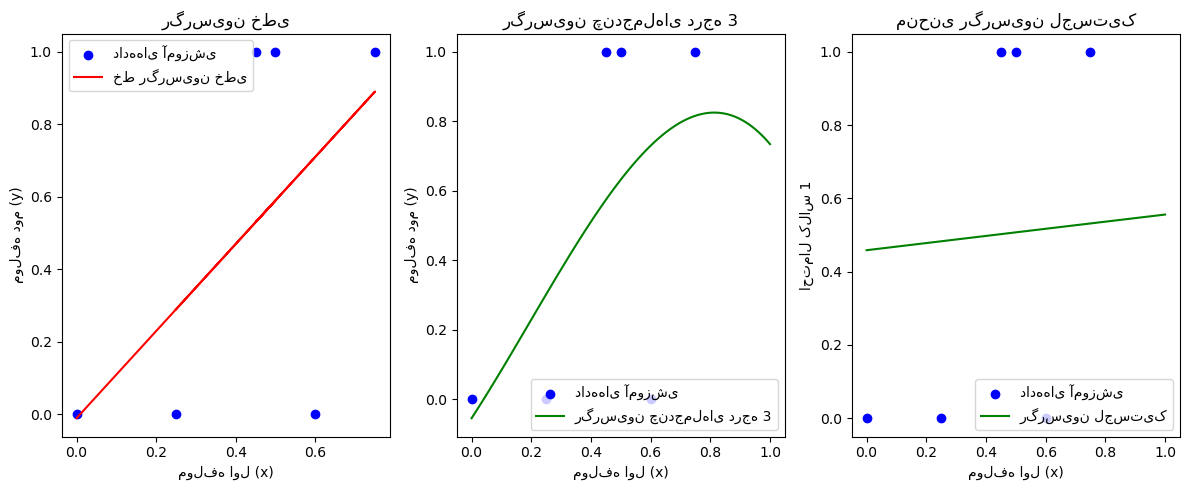

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

# Logistic sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# داده‌های آموزشی
X = np.array([[0.25], [0.5], [0.45], [0.75], [0.6], [0]])
y = np.array([0, 1, 1, 1, 0, 0])

# ایجاد ماتریس طراحی با افزودن ستون یک به داده‌های ورودی
X_design = np.hstack([np.ones((X.shape[0], 1)), X])

# محاسبه پارامترهای مدل با استفاده از روش رگرسیون خطی
params = np.linalg.inv(X_design.T.dot(X_design)).dot(X_design.T).dot(y)

# استخراج پارامترهای مدل
intercept, slope = params

# ترسیم داده‌ها و خط رگرسیون خطی
plt.figure(figsize=(12, 5))
plt.subplot(1, 3, 1)
plt.scatter(X, y, color='blue', label='داده‌های آموزشی')
plt.plot(X, X_design.dot(params), color='red', label='خط رگرسیون خطی')
plt.xlabel('مولفه اول (x)')
plt.ylabel('مولفه دوم (y)')
plt.title('رگرسیون خطی')
plt.legend()

# نمایش معادله رگرسیون خطی
print("معادله رگرسیون خطی: y = {:.2f}x + {:.2f}".format(slope, intercept))

# داده‌های تست
X_test = np.array([[0.15], [0.36], [0.57], [1], [0.83]])
y_test = np.array([0, 0, 1, 1, 1])

# پیش‌بینی برای داده‌های تست
y_pred_test = intercept + slope * X_test

# محاسبه خطا برای هر داده تست
errors = np.abs(y_test - (slope * X_test.flatten() + intercept))

# چاپ پیش‌بینی‌ها و خطاها
for i in range(len(X_test)):
    print("پیش‌بینی مدل برای داده جدید {}: {:.2f}".format(X_test[i][0], y_pred_test[i][0]))
    print("خطای مدل برای داده جدید {}: {:.2f}".format(X_test[i][0], errors[i]))
    print()  # خط فاصله
   
print() # خط فاصله

# اضافه کردن رگرسیون چندجمله‌ای درجه سوم
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)

# مدل رگرسیون چندجمله‌ای درجه سوم
poly_reg = LinearRegression()
poly_reg.fit(X_poly, y)

# ترسیم داده‌ها و منحنی رگرسیون چندجمله‌ای
X_plot = np.linspace(0, 1, 100)[:, np.newaxis]
X_plot_poly = poly.transform(X_plot)
y_plot = poly_reg.predict(X_plot_poly)

# پیش‌بینی برای داده‌های تست
y_pred_test_poly = poly_reg.predict(poly.transform(X_test))

# محاسبه خطا برای هر داده تست برای رگرسیون چندجمله‌ای درجه 3
errors_poly = np.abs(y_test - y_pred_test_poly)

# چاپ پیش‌بینی‌ها و خطاها برای رگرسیون چندجمله‌ای درجه 3
print("خطای مدل برای داده‌های تست برای رگرسیون چندجمله‌ای درجه 3:")
for i in range(len(X_test)):
    print("پیش‌بینی مدل برای داده جدید {}: {:.2f}".format(X_test[i][0], y_pred_test_poly[i]))
    print("خطای مدل برای داده جدید {}: {:.2f}".format(X_test[i][0], errors_poly[i]))
    print()  # خط فاصله

print()  # خط فاصله
plt.subplot(1, 3, 2)
plt.scatter(X, y, color='blue', label='داده‌های آموزشی')
plt.plot(X_plot, y_plot, color='green', label='رگرسیون چندجمله‌ای درجه 3')
plt.xlabel('مولفه اول (x)')
plt.ylabel('مولفه دوم (y)')
plt.title('رگرسیون چندجمله‌ای درجه 3')
plt.legend()

# مدل رگرسیون لجستیک
log_reg = LogisticRegression()

# آموزش مدل رگرسیون لجستیک با داده‌های آموزشی
log_reg.fit(X, y)

# ترسیم داده‌ها و منحنی رگرسیون لجستیک
X_plot = np.linspace(0, 1, 1000)[:, np.newaxis]
y_plot = log_reg.predict_proba(X_plot)[:, 1]  # احتمال کلاس 1 برای هر نقطه
plt.subplot(1, 3, 3)
plt.scatter(X, y, color='blue', label='داده‌های آموزشی')
plt.plot(X_plot, sigmoid(X_plot * log_reg.coef_ + log_reg.intercept_).ravel(), color='green', label='رگرسیون لجستیک')
plt.xlabel('مولفه اول (x)')
plt.ylabel('احتمال کلاس 1')
plt.title('منحنی رگرسیون لجستیک')
plt.legend()


# پیش‌بینی برای هر داده تست
predictions = log_reg.predict(X_test)

# محاسبه خطا برای هر داده تست
errors = np.abs(y_test - predictions)

# چاپ مقادیر پیش‌بینی شده و خطا برای هر داده
print("خطای مدل برای داده‌های تست برای رگرسیون لجستیک:")
for i, pred in enumerate(predictions):
    print(f'کلاس پیش‌بینی برای داده {X_test[i][0]}: {pred}')
    print(f'خطای مدل برای داده {X_test[i][0]}: {errors[i]}')
    print()  # خط فاصله



plt.tight_layout()
plt.show()





